09:26:46.544619
./pkl/experiments/_regression_gran1h_period1_lags2_model-tcn_user47_imp.pkl
1389/6912 fishished experiments
##########
##########
##########


2020-10-13 09:26:46.544619
./pkl/experiments/_regression_gran1h_period4_lags1_model-tcn_user47_imp.pkl
1390/6912 fishished experiments
##########
##########
##########


2020-10-13 09:26:46.545618
./pkl/experiments/_regression_gran1h_period2_lags1_model-tcn_user47_imp.pkl
1391/6912 fishished experiments
##########
##########
##########


2020-10-13 09:26:46.545618
./pkl/experiments/_regression_gran1h_period1_lags1_model-tcn_user47_imp.pkl
1392/6912 fishished experiments
##########
##########
##########


2020-10-13 09:26:46.545618
./pkl/experiments/_regression_gran30min_period4_lags8_model-tcn_user46_imp.pkl
1393/6912 fishished experiments
##########
##########
##########


2020-10-13 09:26:46.546618
./pkl/experiments/_regression_gran30min_period2_lags8_model-tcn_user46_imp.pkl
1394/6912 fishished experiments
##########
#########

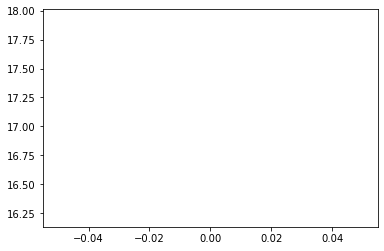

1466/6912 fishished experiments
##########
##########
##########


2020-10-13 09:44:11.417206
./pkl/experiments/_regression_gran30min_period1_lags8_model-tcn_user43_imp.pkl
1467/6912 fishished experiments
##########
##########
##########


2020-10-13 09:44:11.417206
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period4_lags4_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Shapes for this iteration are: 
X_train: (28624, 4, 36)
X_test: (388, 4, 36)
Score: 0.76
Time: 2.656
Model: "tcn"
_________________________________________________________________
Layer (type)                 Output Shape              Pa

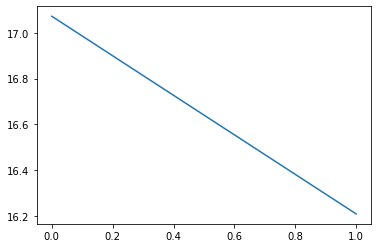

1468/6912 fishished experiments
##########
##########
##########


2020-10-13 10:00:34.995122
./pkl/experiments/_regression_gran30min_period2_lags4_model-tcn_user43_imp.pkl
1469/6912 fishished experiments
##########
##########
##########


2020-10-13 10:00:34.997126
./pkl/experiments/_regression_gran30min_period1_lags4_model-tcn_user43_imp.pkl
1470/6912 fishished experiments
##########
##########
##########


2020-10-13 10:00:34.997506
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period4_lags2_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Shapes for this iteration are: 
X_train: (29442, 2, 36)
X_test: 

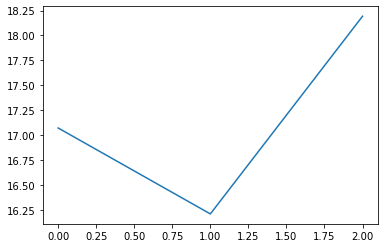

1471/6912 fishished experiments
##########
##########
##########


2020-10-13 10:18:53.919284
./pkl/experiments/_regression_gran30min_period2_lags2_model-tcn_user43_imp.pkl
1472/6912 fishished experiments
##########
##########
##########


2020-10-13 10:18:53.921284
./pkl/experiments/_regression_gran30min_period1_lags2_model-tcn_user43_imp.pkl
1473/6912 fishished experiments
##########
##########
##########


2020-10-13 10:18:53.923285
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period4_lags1_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Shapes for this iteration are: 
X_train: (29880, 1, 36)
X_test: 

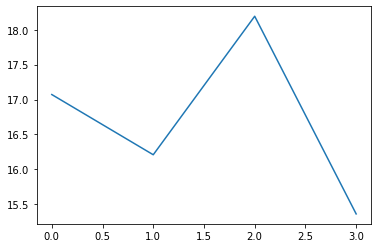

1474/6912 fishished experiments
##########
##########
##########


2020-10-13 10:34:21.727283
./pkl/experiments/_regression_gran30min_period2_lags1_model-tcn_user43_imp.pkl
1475/6912 fishished experiments
##########
##########
##########


2020-10-13 10:34:21.728282
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period1_lags1_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Shapes for this iteration are: 
X_train: (21909, 1, 36)
X_test: (481, 1, 36)
Score: 0.472
Time: 1.76
Model: "tcn"
_________________________________________________________________
Layer (type)                 Output Shape              Pa

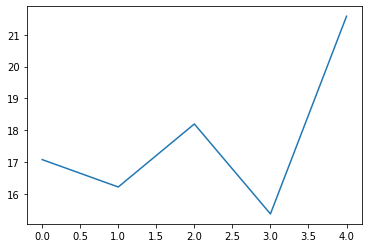

1476/6912 fishished experiments
##########
##########
##########


2020-10-13 10:56:02.574024
./pkl/experiments/_regression_gran1h_period4_lags8_model-tcn_user43_imp.pkl
1477/6912 fishished experiments
##########
##########
##########


2020-10-13 10:56:02.576023
./pkl/experiments/_regression_gran1h_period2_lags8_model-tcn_user43_imp.pkl
1478/6912 fishished experiments
##########
##########
##########


2020-10-13 10:56:02.578127
./pkl/experiments/_regression_gran1h_period1_lags8_model-tcn_user43_imp.pkl
1479/6912 fishished experiments
##########
##########
##########


2020-10-13 10:56:02.578127
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period4_lags4_model-tcn_user43_imp.pkl
Starting iteration 

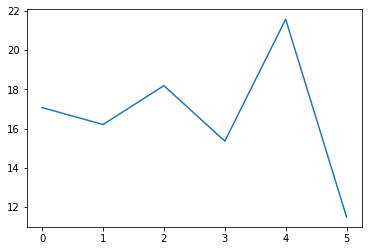

1480/6912 fishished experiments
##########
##########
##########


2020-10-13 11:07:39.149338
./pkl/experiments/_regression_gran1h_period2_lags4_model-tcn_user43_imp.pkl
1481/6912 fishished experiments
##########
##########
##########


2020-10-13 11:07:39.150337
./pkl/experiments/_regression_gran1h_period1_lags4_model-tcn_user43_imp.pkl
1482/6912 fishished experiments
##########
##########
##########


2020-10-13 11:07:39.153337
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period4_lags2_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Shapes for this iteration are: 
X_train: (14562, 2, 36)
X_test: (195, 2, 36)

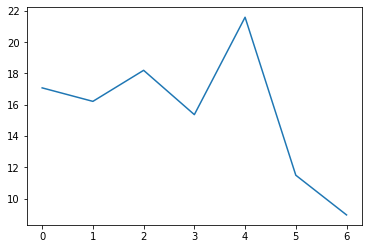

1483/6912 fishished experiments
##########
##########
##########


2020-10-13 11:16:42.006012
./pkl/experiments/_regression_gran1h_period2_lags2_model-tcn_user43_imp.pkl
1484/6912 fishished experiments
##########
##########
##########


2020-10-13 11:16:42.006012
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 2
receptive field:  16
[2, 4, 0.505993020593099, 0, 1, 8, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-tcn_user43_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran1h_period1_lags2_model-tcn_user43_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00060: early stopping
Shapes for this iteration are: 
X_train: (15029, 2, 36)
X_test: (208, 2, 36)
Score: 0.476
Time: 1.508
Model: "tcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

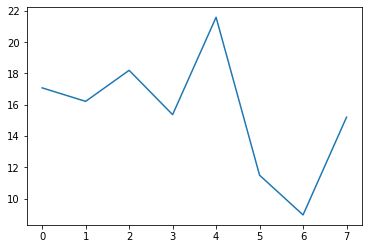

1485/6912 fishished experiments
##########
##########
##########


2020-10-13 11:31:59.470695
./pkl/experiments/_regression_gran1h_period4_lags1_model-tcn_user43_imp.pkl
1486/6912 fishished experiments
##########
##########
##########


2020-10-13 11:31:59.470695
./pkl/experiments/_regression_gran1h_period2_lags1_model-tcn_user43_imp.pkl
1487/6912 fishished experiments
##########
##########
##########


2020-10-13 11:31:59.470695
./pkl/experiments/_regression_gran1h_period1_lags1_model-tcn_user43_imp.pkl
1488/6912 fishished experiments
##########
##########
##########


2020-10-13 11:31:59.470695
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 3
receptive field:  8
[6, 2, 0.8, 0, 1, 6, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-tcn_user42_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period4_lags8_model-tcn_user42_imp.pkl
Starting iteration nb 1 of 5

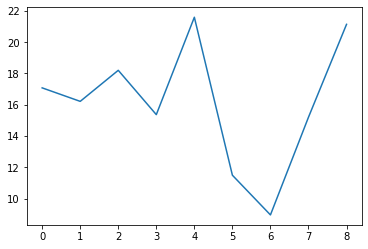

1489/6912 fishished experiments
##########
##########
##########


2020-10-13 11:53:35.614768
./pkl/experiments/_regression_gran30min_period2_lags8_model-tcn_user42_imp.pkl
1490/6912 fishished experiments
##########
##########
##########


2020-10-13 11:53:35.633578
(num_filters, kernel_size, dropout, use_skip_connections, use_batch_norm, nb_lags)
dilations: 3
receptive field:  8
[6, 2, 0.8, 0, 1, 6, 7]
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-tcn_user42_imp
Beginning experiment: 
File reserved pkl/experiments/_regression_gran30min_period1_lags8_model-tcn_user42_imp.pkl
Starting iteration nb 1 of 5
Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
Shapes for this iteration are: 
X_train: (25323, 8, 36)
X_test: (402, 8, 36)
Score: 0.154
Time: 2.637
Model: "tcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resid

In [1]:
import os
import pickle as pkl
from experiments.experiment_running import run_all_experiments
def fitness():
    pass
run_all_experiments(reverse_order=True, experiment_verbose=2, fit_verbose=0, model_verbose=1)